# アンサンブル法

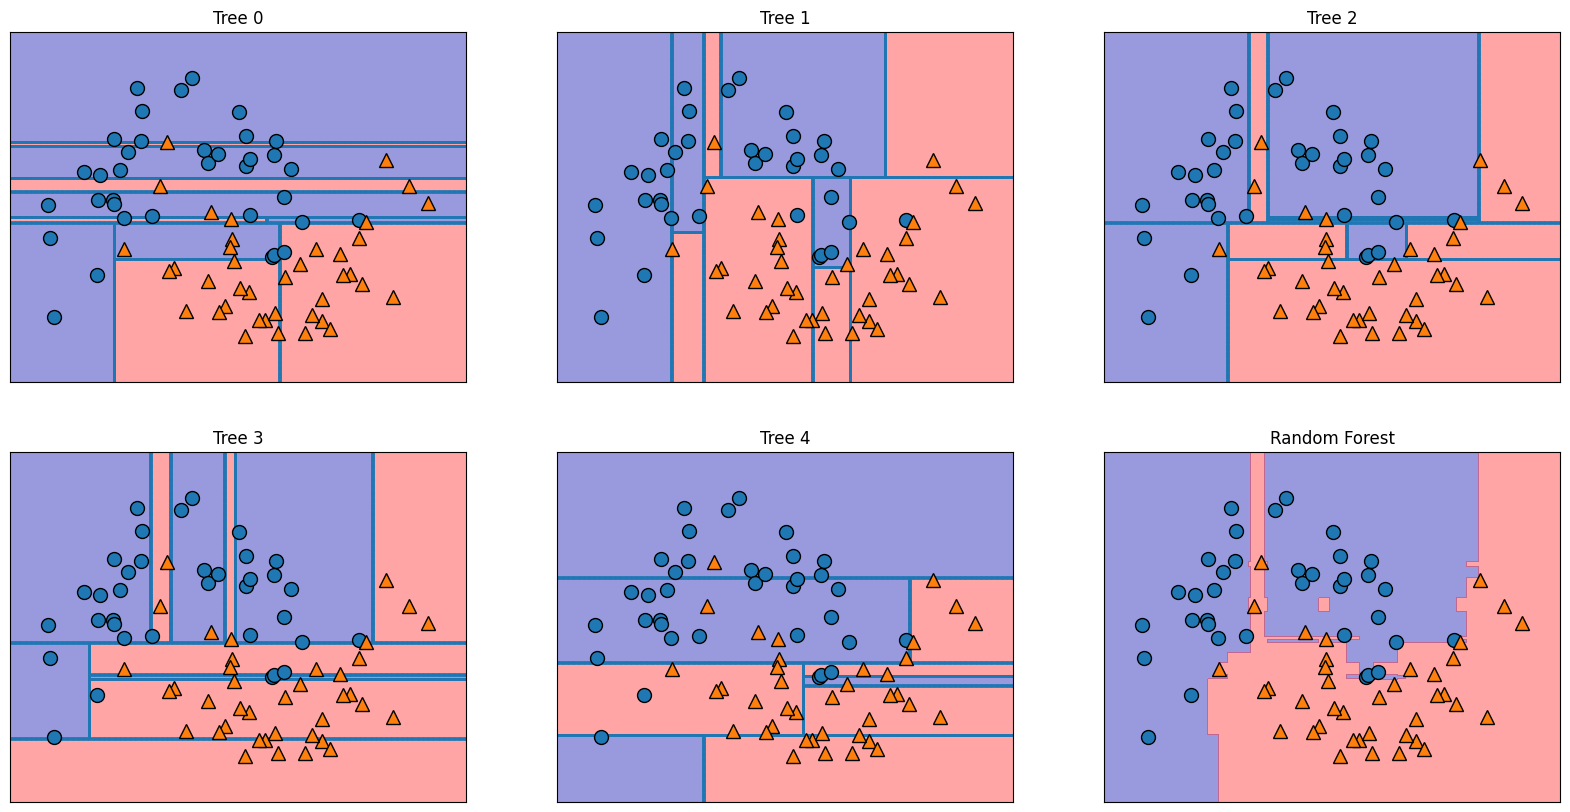

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

## cancerデータに対してのランダムフォレスト

Accuracy on training set: 1.000
Accuracy on test set: 0.972


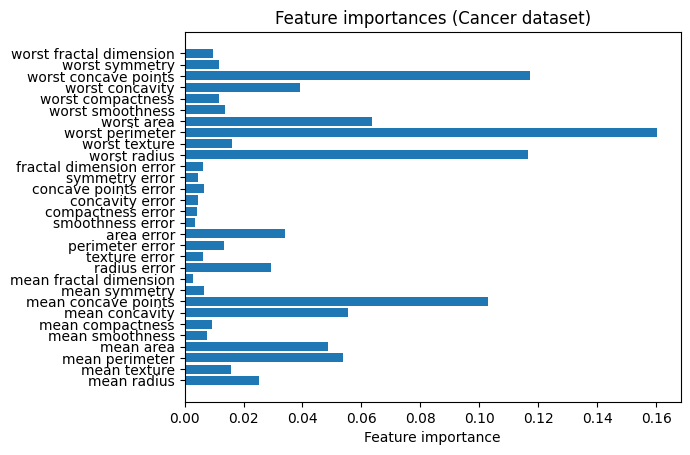

In [5]:
from sklearn.datasets import load_breast_cancer
import utils

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
utils.plot_feature_importances_cancer(forest, cancer)

## 🌳 決定木 (Decision Tree)

- **概要**  
  特徴量を条件分岐（if-else）のように使ってデータを分割し、最終的に予測を行うモデル。

- **数式的表現（分類木の不純度例：ジニ不純度）**

$$
Gini(p) = 1 - \sum_{k=1}^{K} p_k^2
$$

- $p_k$ : クラス $k$ に属するデータの割合  
- 不純度が最も下がる特徴量でデータを分割していく  

---

## 🌲 ランダムフォレスト (Random Forest)

- **仕組み**
  1. **ブートストラップサンプリング**  
     元データからランダムにサンプリングして学習用データを作成。
  2. **特徴量のランダム選択**  
     各分岐点で使う特徴量をランダムに制限。
  3. **多数の決定木を学習**  
     それぞれの木が独自の予測を行う。
  4. **結果の集約**  
     - 分類：多数決  
     - 回帰：平均値  

---

### 数式的表現

- **分類問題（多数決）**

$$
\hat{y} = \mathrm{mode} \{ h_1(x), h_2(x), \dots, h_M(x) \}
$$

- **回帰問題（平均）**

$$
\hat{y} = \frac{1}{M} \sum_{m=1}^{M} h_m(x)
$$

ここで  
- $h_m(x)$：m番目の決定木による予測  
- $M$：木の本数  

---

## ✅ メリット
- 過学習を防ぎやすい  
- 高い精度と安定性  
- 特徴量の重要度が評価できる  

## ⚠️ デメリット
- モデルの解釈が難しい  
- 計算コストが高い  

---

## 📊 イメージ図（概念）


データ ----> [ 決定木1 ] ----
[ 決定木2 ] ----- > ( 投票 or 平均 ) ---> 最終予測
[ 決定木3 ] ----/
...

---
